In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
import chainer.computational_graph as c
import matplotlib.pyplot as plt
from save_mnist_digit_fig import save_images,plot_images
from fetch_mnist import * #mnist_data の取得
import pandas as pd
%matplotlib inline

In [33]:
class MultiP(Chain):
    def __init__(self,activate = F.relu):
        super(MultiP,self).__init__(
            l1 = L.Linear(28*28,28*28),
            l2 = L.Linear(28*28,100),
            l3 = L.Linear(100,10))
        self.activate=activate
        
    def __call__(self,x,train=True):
        self.h1 = F.dropout(self.activate(self.l1(x)),train=train)
        self.h2 = F.dropout(self.activate(self.l2(self.h1)),train=train)
        self.h3 = F.dropout(self.activate(self.l3(self.h2)),train=train)
        return self.h3

In [36]:
multiperceptron = MultiP(activate=F.sigmoid)

In [35]:
data,target = fetch_mnist()

--- fetch MNIST dataset ---
--- completed!! ---


In [5]:
def cal_loss(train=True):
    i = 0
    if train:
        i = 0
    else:
        i = 1
    print "calculate_loss"
    y = multiperceptron(Variable(data[i]),train=False)
    t = Variable(target[i]) 
    sum_loss = F.softmax_cross_entropy(y,t).data
    acc = F.accuracy(y,t).data
    print sum_loss,acc
    return sum_loss,acc

In [48]:
n_epoch = 30
batchsize = 100
N = len(data[0])
optimizer = optimizers.AdaDelta()
optimizer.setup(multiperceptron)

empirical_loss = []
predictive_loss = []
for epoch in range(1,n_epoch+1):
    print "epoch",epoch
    perm = np.random.permutation(N)
    
    for i in range(0,N,batchsize):
        x = Variable(data[0][perm[i:i+batchsize]])
        t = Variable(target[0][perm[i:i+batchsize]])
        multiperceptron.zerograds()
        y = multiperceptron(x)
        loss = F.softmax_cross_entropy(y,t)
        loss.backward()
        optimizer.update()
    
    empirical_loss.append(cal_loss())
    predictive_loss.append(cal_loss(train=False))
    
empirical_loss = np.array(empirical_loss)
predictive_loss = np.array(predictive_loss)

epoch 1
calculate_loss
1.51249730587 0.945561885834
calculate_loss
1.51526963711 0.941771447659
epoch 2
calculate_loss
1.51212584972 0.946095228195
calculate_loss
1.51455068588 0.942114293575
epoch 3
calculate_loss
1.51111841202 0.9481523633
calculate_loss
1.51408326626 0.94417142868
epoch 4
calculate_loss
1.51090502739 0.947638094425
calculate_loss
1.51397383213 0.944285690784
epoch 5
calculate_loss
1.50913989544 0.949104785919
calculate_loss
1.51188528538 0.945028543472
epoch 6
calculate_loss
1.50837743282 0.949580967426
calculate_loss
1.51152157784 0.944800019264
epoch 7
calculate_loss
1.50719583035 0.951142847538
calculate_loss
1.51026189327 0.947371423244
epoch 8
calculate_loss
1.50686061382 0.951828598976
calculate_loss
1.51009261608 0.946399986744
epoch 9
calculate_loss
1.50543963909 0.952152371407
calculate_loss
1.50862133503 0.948457121849
epoch 10
calculate_loss
1.50576364994 0.952533304691
calculate_loss
1.50922882557 0.948285698891
epoch 11
calculate_loss
1.50529956818 0.95

# Predictive and Empirical Loss Graphs

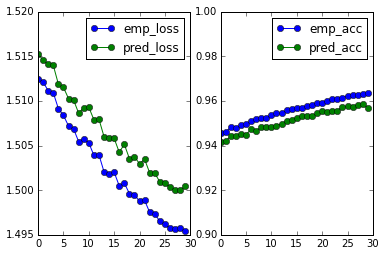

[ 1.50044179  0.95697141]


In [49]:
plt.subplot(1,2,1)
plt.plot(empirical_loss[:,0],"o-",label="emp_loss")
plt.plot(predictive_loss[:,0],"o-",label="pred_loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(empirical_loss[:,1],"o-",label="emp_acc")
plt.plot(predictive_loss[:,1],"o-",label="pred_acc")
plt.ylim(0.9,1.0)
plt.legend()
plt.show()
print predictive_loss[-1]

# Visualize output
出力を可視化する為に、適当なサンプルを入力した時の、各中間層の値を画像にしてみる。

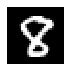

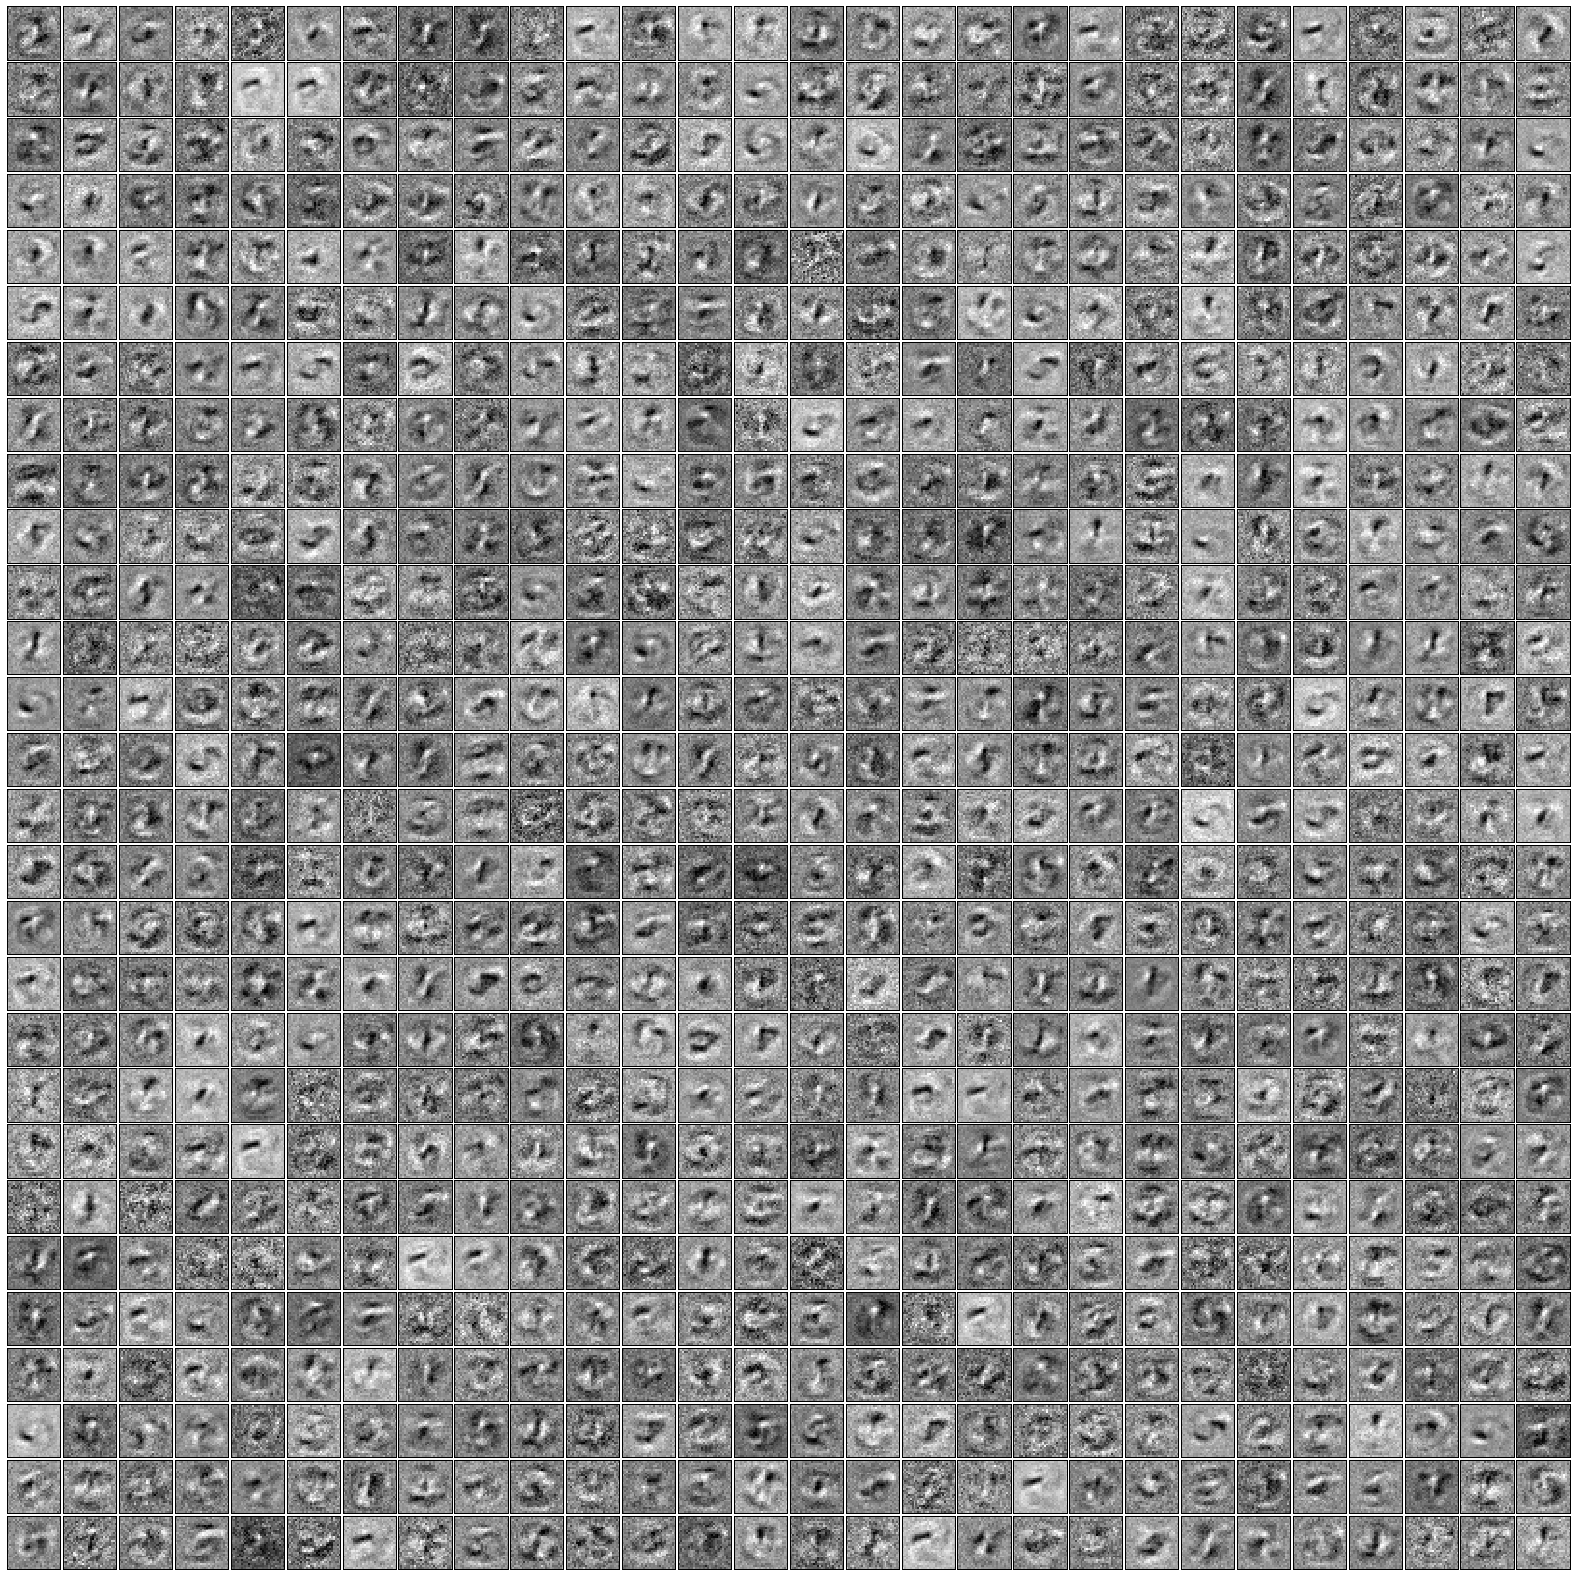

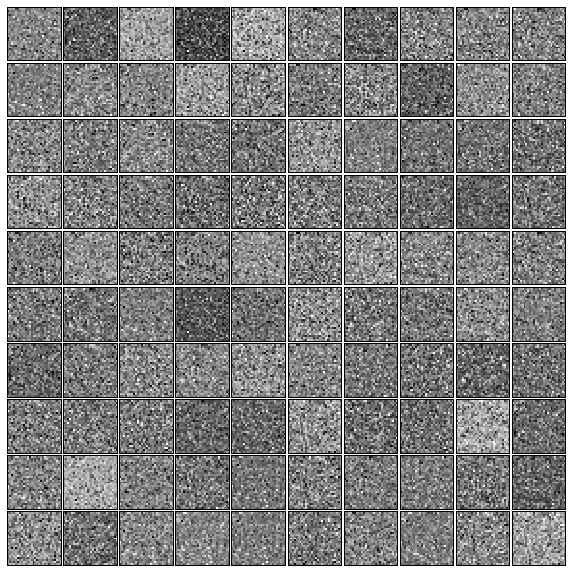

[[ 0.08533721  0.08533751  0.08534017  0.08534032  0.08533719  0.08533721
   0.08533719  0.08533719  0.23195879  0.08533719]]


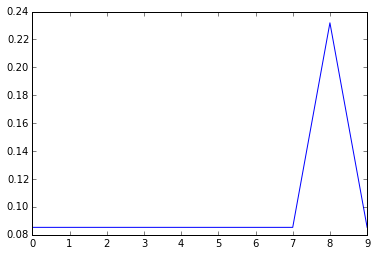

In [50]:
y = multiperceptron(Variable(data[1][2].reshape(1,28,28)),train=False)
plot_images(data[1][2].reshape(1,28*28)) #原画像
plt.show()
plot_images(multiperceptron.l1.W.data) #重み第一層
plt.show()
plot_images(multiperceptron.l2.W.data) #重み第二層
plt.show()
# plot_images(multiperceptron.h3.data)
# plt.show()
print F.softmax(y).data
plt.plot(F.softmax(y).data[0])


In [52]:
serializers.save_npz('multilayerperceptron_0219.model',multiperceptron)

# Predictive Loss

In [ ]:
y = multiperceptron(Variable(data[1]))
t = Variable(target[1])
print F.softmax_cross_entropy(y,t).data
print F.accuracy(y,t).data

In [ ]:
s_l = L.Linear(4,3)

In [ ]:
x = np.random.normal(size=4)
x = x.astype(np.float32)
print x.shape
x = x.reshape(1,4)
print x.shape

In [ ]:
s_l.W

In [ ]:
s_l.W.data

In [ ]:
y = s_l(Variable(x))

In [ ]:
y.data.shape

In [ ]:
save_images(multiperceptron.l1.W.data,filename="multiperceptron_l1.png")

In [ ]:
save_images(multiperceptron.l2.W.data,filename="multiperceptron_l2.png")

In [ ]:
save_images(multiperceptron.l3.W.data,filename="multiperceptron_l3.png")